<a href="https://colab.research.google.com/github/hadi-yazdi/hadi-yazdi.github.io/blob/master/historical_buildings_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
train_zipfile = files.upload()

Saving test-historical-buildings.zip to test-historical-buildings.zip


In [ ]:
import os
import zipfile

local_zip = '/content/train-historical-buildings.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/train-historical-buildings')
local_zip = '/content/validation-historical-buildings.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-historical-buildings')
local_zip = '/content/test-historical-buildings.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/test-historical-buildings')
zip_ref.close()

# **Visualazing the photos**

In [ ]:
train_historical_dir = os.path.join('/content/train-historical-buildings/historical')

train_not_historical_dir = os.path.join('/content/train-historical-buildings/not-historical')

validation_historical_dir = os.path.join('/content/validation-historical-buildings/historical')

validation_not_historical_dir = os.path.join('/content/validation-historical-buildings/not-historical')

In [ ]:
train_historical_names = os.listdir(train_historical_dir)
print(train_historical_names[:15])

train_not_historical_names = os.listdir(train_not_historical_dir)
print(train_not_historical_names[:15])

validation_historical_hames = os.listdir(validation_historical_dir)
print(validation_historical_hames[:10])

validation_not_historical_names = os.listdir(validation_not_historical_dir)
print(validation_not_historical_names[:10])

['2-68.JPG', '3-24.JPG', '1-104.JPG', '4-12.JPG', '4-57.JPG', '6-29.JPG', '1-21.JPG', '6-52.JPG', '1-206.JPG', '5-65.JPG', '2-7.JPG', '2-13.JPG', '4-61.JPG', '2-72.JPG', '3-1.JPG']
['12-7.JPG', '13-19.JPG', '11-69.JPG', '12-39.JPG', '7-53.JPG', '9-5.JPG', '12-71.JPG', '12-73.JPG', '13-74.JPG', '14-32.JPG', '13-10.JPG', '7-35.JPG', '11-29.JPG', '8-71.JPG', '10-20.JPG']
['6-14.JPG', '2-43.JPG', '5-8.JPG', '1-195.JPG', '1-212.JPG', '6-15.JPG', '1-44.JPG', '4-67.JPG', '1-78.JPG', '4-34.JPG']
['14-68.JPG', '14-52.JPG', '14-69.JPG', '13-30.JPG', '11-45.JPG', '7-76.JPG', '9-55.JPG', '12-31.JPG', '8-13.JPG', '10-41.JPG']


In [ ]:
print('total training historical images:', len(os.listdir(train_historical_dir)))
print('total training not historical images:', len(os.listdir(train_not_historical_dir)))
print('total validation historical images:', len(os.listdir(validation_historical_dir)))
print('total validation not historical images:', len(os.listdir(validation_not_historical_dir)))

total training historical images: 512
total training not historical images: 512
total validation historical images: 128
total validation not historical images: 128


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

<Figure size 1152x1152 with 0 Axes>

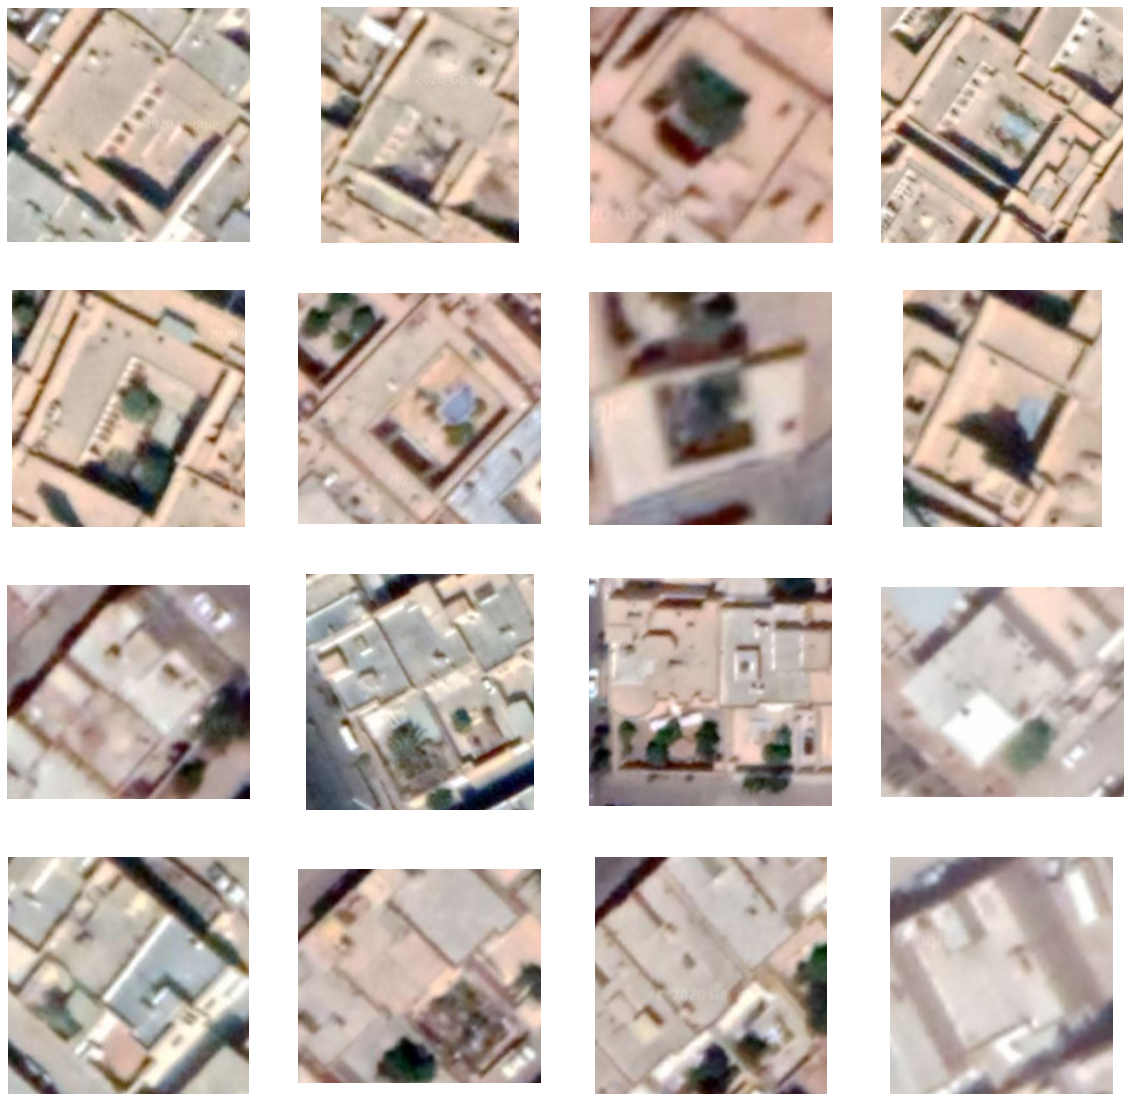

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_historical_pix = [os.path.join(train_historical_dir, fname) 
                for fname in train_historical_names[pic_index-8:pic_index]]
next_not_historical_pix = [os.path.join(train_not_historical_dir, fname) 
                for fname in train_not_historical_names[pic_index-8:pic_index]]

plt.figure(figsize=[20,20])
for i, img_path in enumerate(next_historical_pix+next_not_historical_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# **Building the CNN Model**

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # droping out 50% of neurons
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('historical') and 1 for the other ('not-historical')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   #zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  )
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train-historical-buildings/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/validation-historical-buildings/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1024 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Training

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 20s 2s/step - loss: 0.9162 - accuracy: 0.5049 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 22s 3s/step - loss: 0.6830 - accuracy: 0.5127 - val_loss: 0.7411 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 22s 3s/step - loss: 0.7849 - accuracy: 0.5635 - val_loss: 0.6351 - val_accuracy: 0.8750
Epoch 4/100
8/8 [==============================] - 22s 3s/step - loss: 0.7499 - accuracy: 0.6562 - val_loss: 0.6597 - val_accuracy: 0.5195
Epoch 5/100
8/8 [==============================] - 22s 3s/step - loss: 0.5679 - accuracy: 0.6719 - val_loss: 0.4403 - val_accuracy: 0.8086
Epoch 6/100
8/8 [==============================] - 22s 3s/step - loss: 0.6873 - accuracy: 0.6748 - val_loss: 0.5776 - val_accuracy: 0.7070
Epoch 7/100
8/8 [==============================] - 22s 3s/step - loss: 0.5690 - accuracy: 0.6904 - val_loss: 0.4117 - val_accuracy: 0.8008
Epoch 8/100
8/8 [==========

# Plotting the accuracy and loss

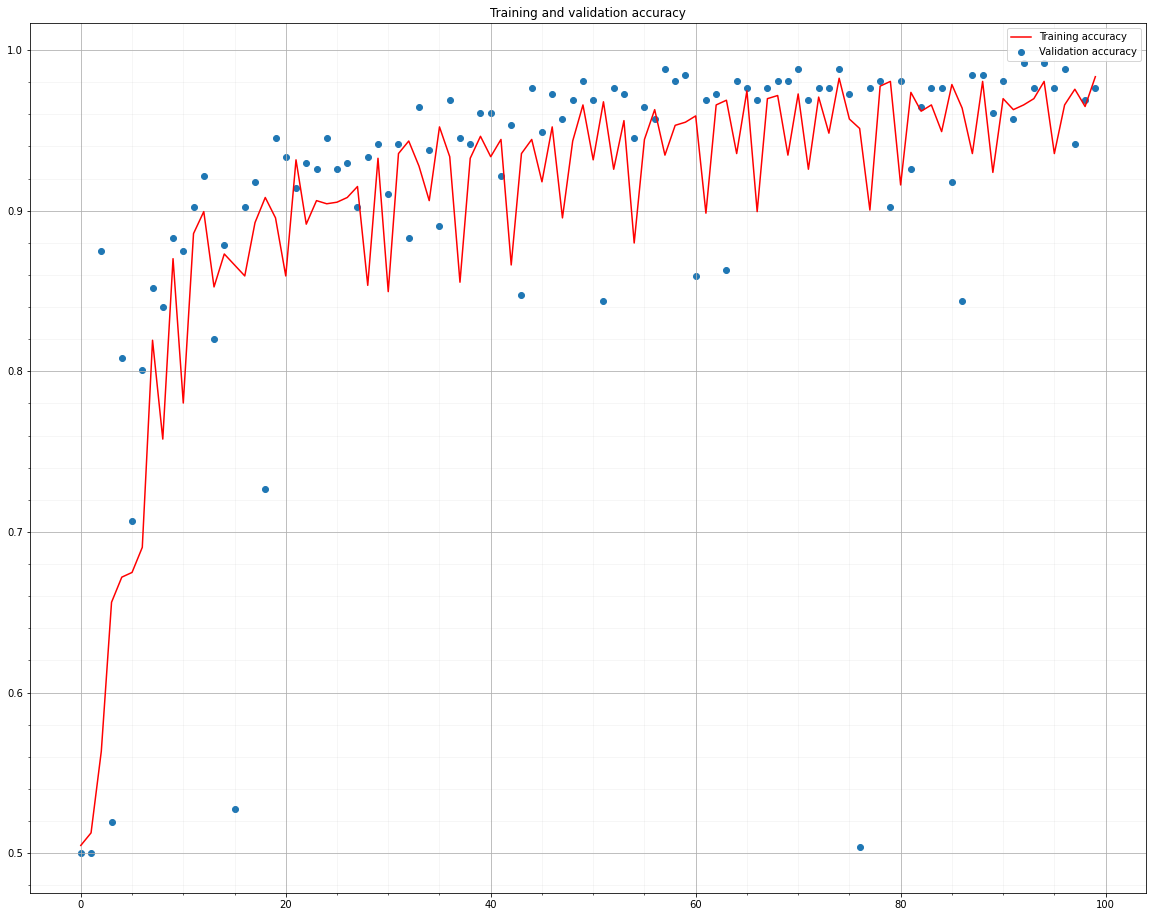

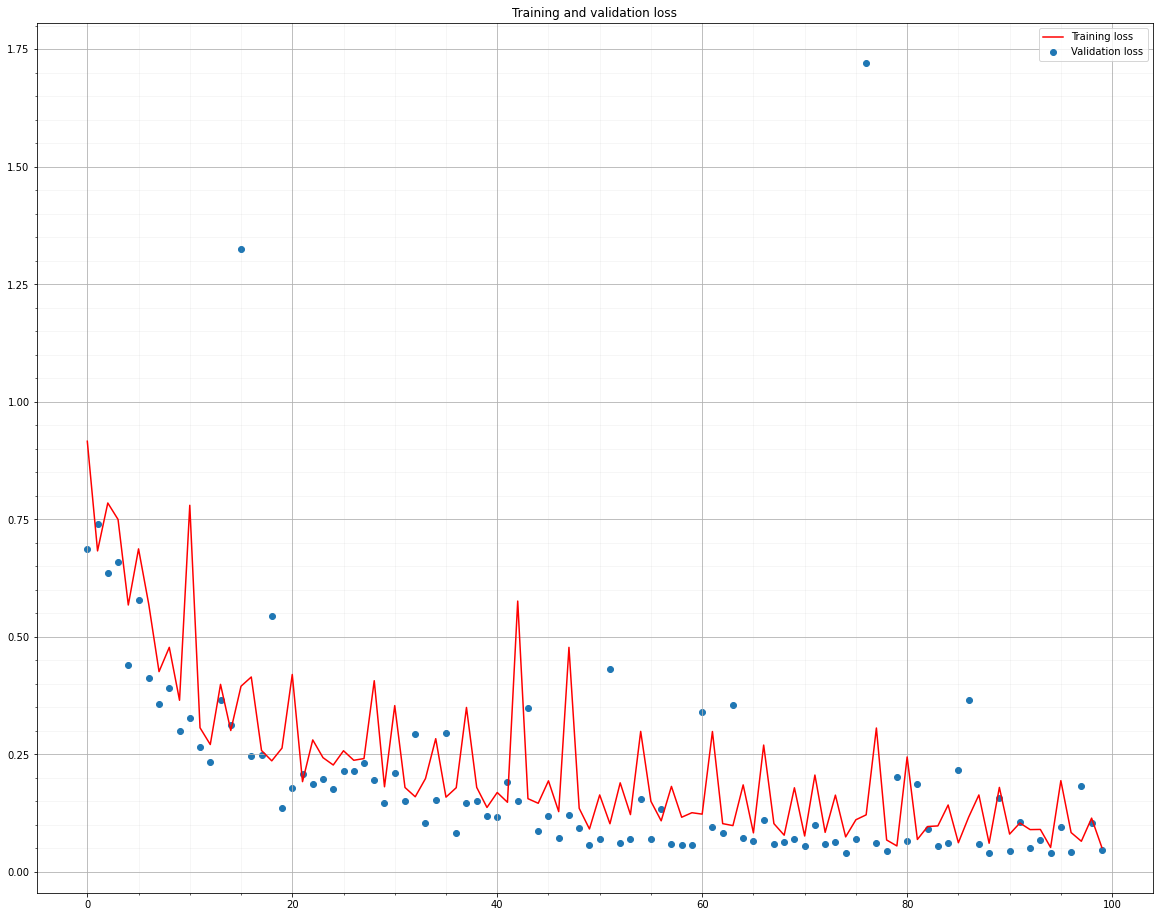

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=[20,16])
plt.plot  ( epochs,     acc , 'r', label='Training accuracy')
plt.scatter  ( epochs, val_acc , label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.grid()
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
plt.legend(loc=0)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure(figsize=[20,16])
plt.plot  ( epochs,     loss , 'r', label='Training loss')
plt.scatter  ( epochs, val_loss , label='Validation loss')
plt.title ('Training and validation loss')
plt.grid()
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)
plt.legend(loc=0)

plt.show()

# Running the Model

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is not a historical building")
  else:
    print(fn + " is a historical building")

# Visualizing Intermediate Representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


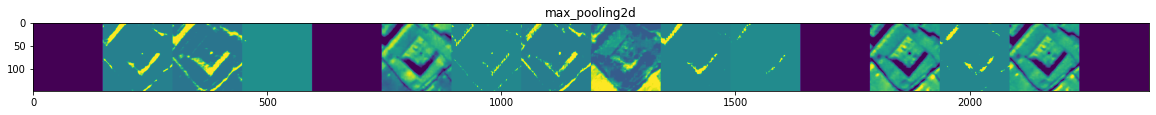

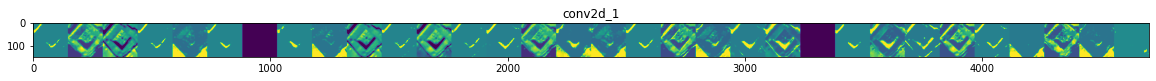

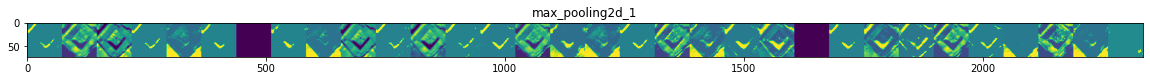

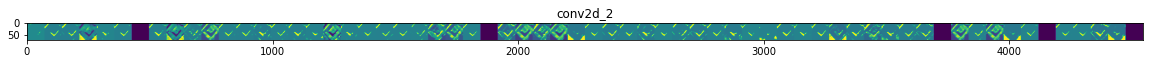

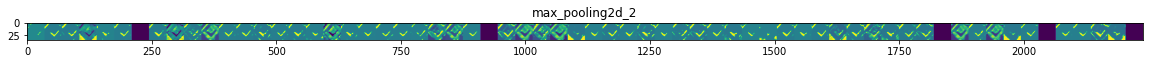

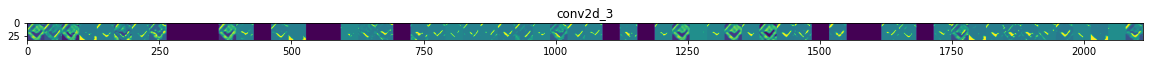

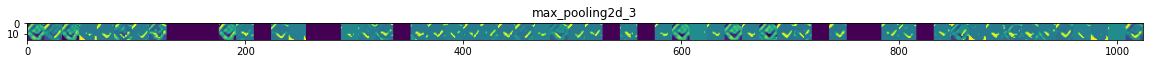

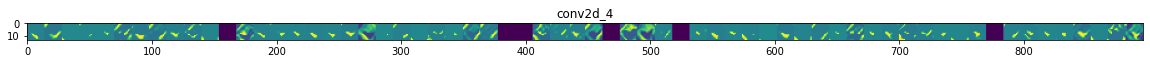

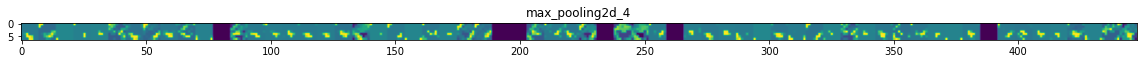

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
historical_img_files = [os.path.join(train_historical_dir, f) for f in train_historical_names]
not_historical_img_files = [os.path.join(train_not_historical_dir, f) for f in train_not_historical_names]
img_path = random.choice(historical_img_files + not_historical_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Confusion Matrix

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)


test_generator = test_datagen.flow_from_directory(
        '/content/validation-historical-buildings/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        shuffle=False )

Found 256 images belonging to 2 classes.


In [ ]:
import numpy as np
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred)
classes = test_generator.classes
print('Confusion Matrix')
print(tf.math.confusion_matrix(classes, y_pred ))

Confusion Matrix
tf.Tensor(
[[127   1]
 [  5 123]], shape=(2, 2), dtype=int32)


In [ ]:
test2_datagen = ImageDataGenerator(rescale=1/255)


test2_generator = test2_datagen.flow_from_directory(
        '/content/test-historical-buildings/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=17,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        shuffle=False )

Found 34 images belonging to 2 classes.


In [ ]:
import numpy as np
test2_generator.reset()
Y_pred = model.predict(test2_generator)
y_pred = np.round(Y_pred)
classes = test2_generator.classes
print('Confusion Matrix')
print(tf.math.confusion_matrix(classes, y_pred ))

Confusion Matrix
tf.Tensor(
[[17  0]
 [ 3 14]], shape=(2, 2), dtype=int32)


In [ ]:
from google.colab import files
!rm -rf train-historical-buildings.zip
!rm -rf validation-historical-buildings.zip
!rm -rf train-historical-buildings
!rm -rf validation-historical-buildings